<a href="https://colab.research.google.com/github/imaj1512/Salary-prediction/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAN APPROVAL PREDICTION**





Aim:
To develop predictive model for Loan approval prediction

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv')


df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.shape


(614, 13)

In [ ]:
#view the dataset dimension

df.ndim

2

In [ ]:
#view the all columns in the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#checking for missing values
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
# checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:

df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
#Removing duplicate rows
df=df.drop_duplicates()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#After removing duplicate values checking the number of rows and columns
df.shape

(614, 13)

In [ ]:
#check the descriptive statistics of numeric variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#view the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#checking unique value to object type columns
features=['Loan_ID','Gender','Married','Dependents', 'Education', 'Self_Employed', 'Property_Area',  'Loan_Status']
for i in features:
  print(df[i].unique(),i)
  print('----------------')

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

In [ ]:
# checking value counts of each column
features=['Loan_ID',	'Gender','Married',	'Dependents'	,'Education'	,'Self_Employed' ,'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

for i in features:

  print(df[i].value_counts(),i)
  print('--------------------')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64 Loan_ID
--------------------
Gender
Male      489
Female    112
Name: count, dtype: int64 Gender
--------------------
Married
Yes    398
No     213
Name: count, dtype: int64 Married
--------------------
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64 Dependents
--------------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64 Education
--------------------
Self_Employed
No     500
Yes     82
Name: count, dtype: int64 Self_Employed
--------------------
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64 ApplicantIncome
--------------------
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0 

In [ ]:
#Drop the columns which are not necessary
df=df.drop(['Loan_ID','Self_Employed'],axis=1)




In [ ]:
df


,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isna().any()

Gender                True
Married               True
Dependents            True
Education            False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
df['Gender'] = df['Gender'].ffill()
df['Dependents'] = df['Dependents'].ffill()
df['LoanAmount'] = df['LoanAmount'].ffill()
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].ffill()
df['Credit_History'] = df['Credit_History'].ffill()

In [ ]:
df.isna().any()

Gender               False
Married               True
Dependents           False
Education            False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
df['LoanAmount'] = df['LoanAmount'].bfill()

In [ ]:
df['Married']=df['Married'].bfill()

In [ ]:
df.isna().any()

Gender               False
Married              False
Dependents           False
Education            False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

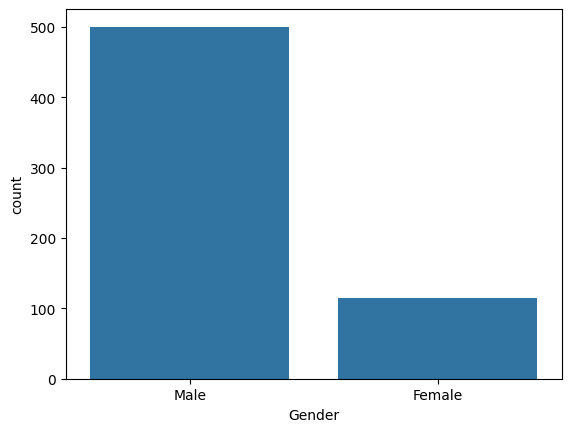

In [ ]:
sns.countplot(x="Gender",data=df)
plt.show()

No of Male applicant : 500 No Female applicant : 100

Count plot shows, the number of male applicants is higher than female applicants.

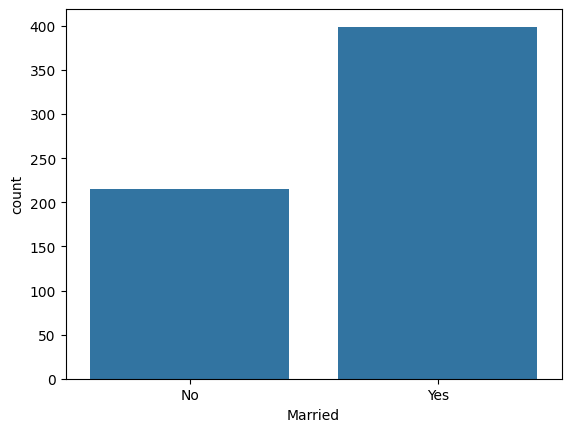

In [ ]:
sns.countplot(x="Married",data=df)
plt.show()

Married applicatns is higher compared to unmarried applicant.

In [ ]:
df.Loan_Status.value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

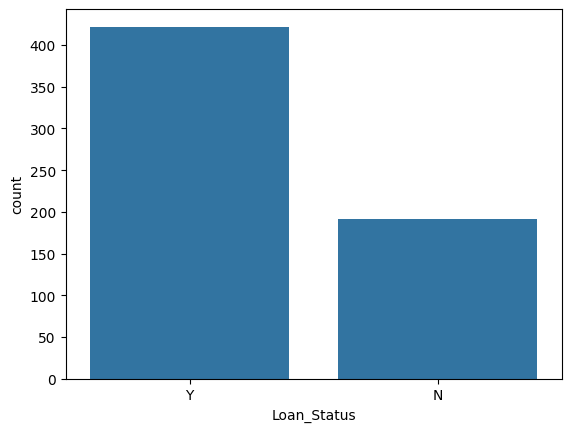

In [ ]:
sns.countplot(x="Loan_Status",data=df)
plt.show()

The number of approved loans is higher than the rejected loans.



<Axes: title={'center': 'Loan_Amount_Term'}, ylabel='Loan_Amount_Term'>

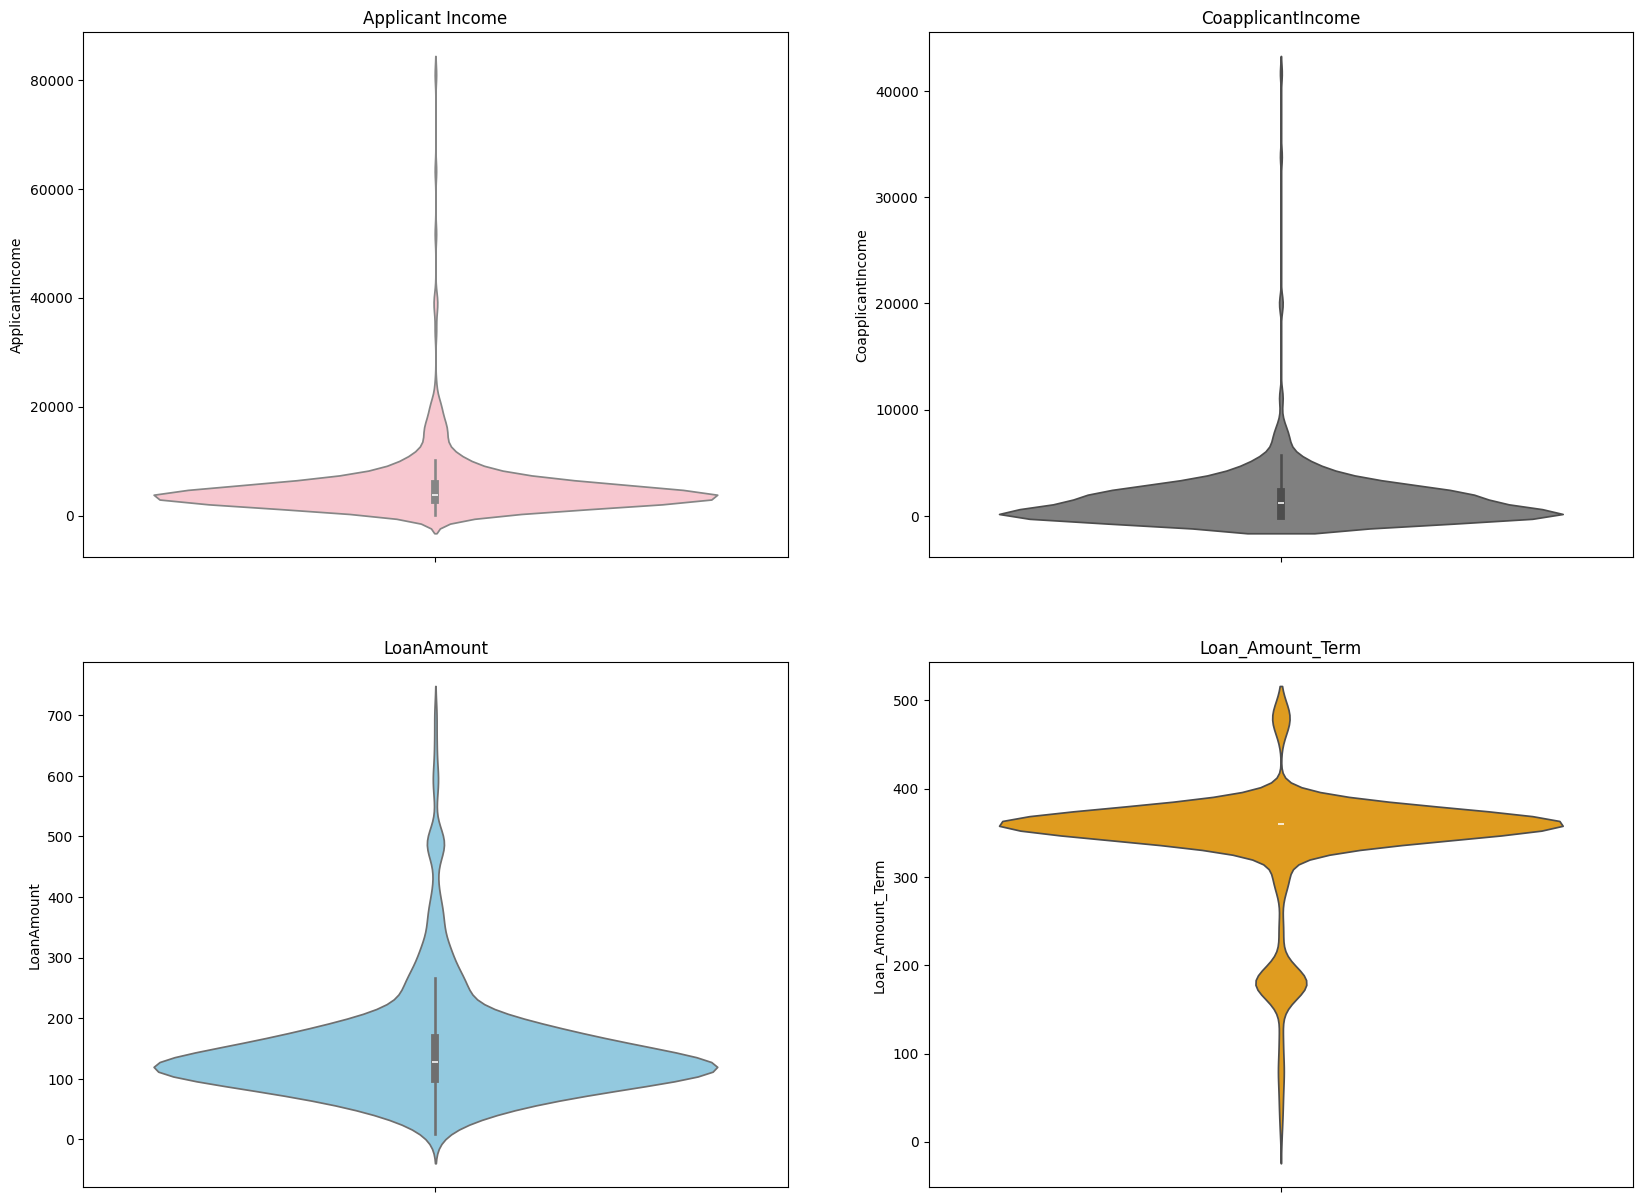

In [ ]:
#Violin Plot

fig, axis1 = plt.subplots(2, 2, figsize=(20,15))
axis1[0,0].set_title("Applicant Income")
sns.violinplot(data=df,y="ApplicantIncome",ax=axis1[0,0],color="pink")
axis1[0,1].set_title("CoapplicantIncome")
sns.violinplot(data=df,y="CoapplicantIncome",ax=axis1[0,1],color="grey")
axis1[1,0].set_title("LoanAmount")
sns.violinplot(data=df,y="LoanAmount",ax=axis1[1,0],color="skyblue")
axis1[1,1].set_title("Loan_Amount_Term")
sns.violinplot(data=df,y="Loan_Amount_Term",ax=axis1[1,1],color="orange")


The distribution of Applicant Income, Co Applicant Income and Loan Amount are positively skewed and it has outliers.

The distribution of Loan Amount Term is negatively skewed and it has outliers.

<AxesSubplot:title={'center':'Loan_Amount_Term'}, ylabel='Loan_Amount_Term'>

<Axes: >

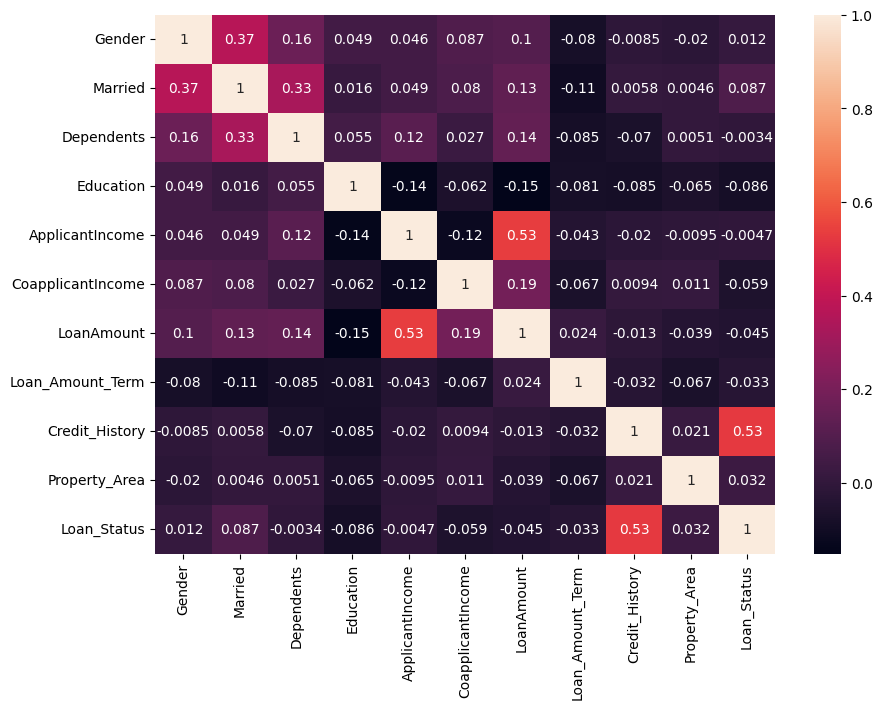

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

There is positive correlation between Loan Amount and Applicant Income

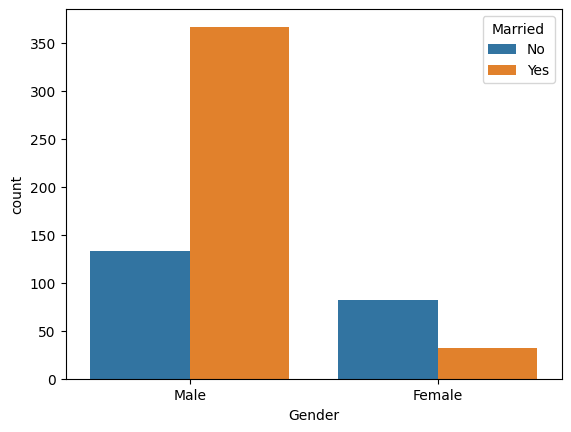

In [ ]:
sns.countplot(x="Gender",hue="Married",data=df)
plt.show()

More male applicants are married compared to female applicants

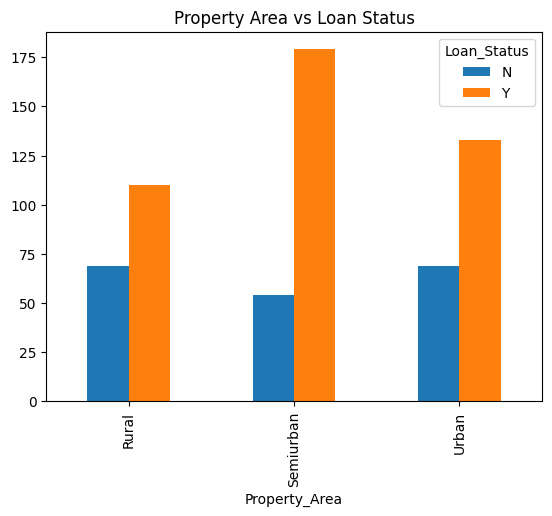

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar")
plt.title("Property Area vs Loan Status")
plt.show()

Most Loan that got accepted has property in Semiurban compared to Urban and Rural area.

In [ ]:
#check varaible data types of all columns
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: ylabel='count'>

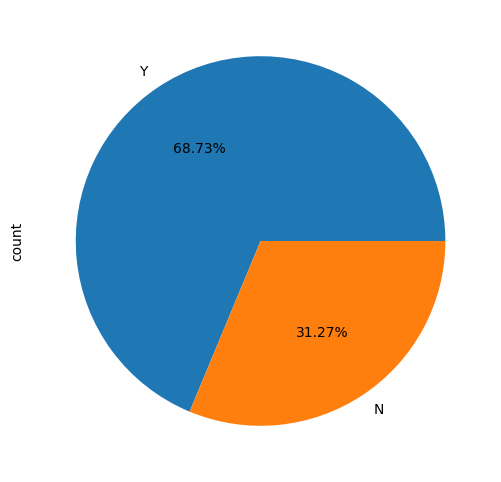

In [ ]:
df["Loan_Status"].value_counts().plot(figsize=(6,6),kind='pie',autopct="%.2f%%")

We can see from the following pie chart that YES has higher count than NO .That means our model will be trained more on YES than NO. In short more people are taking loan.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Gender','Dependents', 'Education', 'Property_Area',  'Loan_Status','Married']
for i in lst:
  df[i]=le.fit_transform(df[i])

  df

In [ ]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,7583,0.0,187.0,360.0,1.0,2,1


MODEL CREATION
Classification Algorithms
K-NEAREST NEIGHBOR (KNN)

GAUSSIAN NAIVE BAYES

BERNOULLI NAIVE BAYES

SUPPORT VECTOR MACHINE

DECISION TREE

RANDOM FOREST

ADA BOOST

XG BOOST

LOGISTIC REGRESSION

PERFORMANCE EVALUATION
Accuracy performance metrics can be decisive when dealing with imbalanced data. In this blog, we will learn about the Confusion matrix and its associated terms, which looks confusing but are trivial. The confusion matrix, precision, recall, and F1 score gives better intuition of prediction results as compared to accuracy.

Confusion Matrix: It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another.

Accuracy Score: Accuracy is the measure of correct predictions made by our model. It is equal to the number of correct predictions made upon total number of predictions made by the model.

Precision Score: It is defined as the ratio of true positives to the sum of true and false positives. It is also known as Positive Predictive Value (PPV).

Recall Score: It is defined as the ratio of true positives to the sum of true positives and false negatives. It is also called True Positive Rate (TPR) or sensitivity.

F1 score: It is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0 , the better the expected performance of the model is.



In [ ]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
#predictors
x.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
#target
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
x.shape

(614, 10)

In [ ]:
y.shape

(614,)

Train Test Split
The train-test split is a technique for evaluating the performance of a machine Learning algoritham.

Train Dataset Used to fit the machine learning model.

choosing split percentage:Train:80%,Test 20%

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#train base size
x_train.shape,y_train.shape

((491, 10), (491,))

In [ ]:
#test base size
x_test.shape,y_test.shape

((123, 10), (123,))

SCALING

It helps to balance the impact of all variables on the euclidean distance calculation and can help to improve the performance of the algorithm.

If not scaled,the feature with a higher value range starts dominating when calculating distances.

Standardization
.it helps to balance the impact of all variables on the euclidean distance calculation and can help to improve the performance of the algorithm.

.if not scaled,the feature with a higher value range starts dominating when calculating distances.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# **1) KNearest Neighbors**   


It is used for classification and regression.in both cases,the input consist of the k closest training examples in data set.The output depends on whether k-nn is used for classification or regression.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

y_pred1=knn_model.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred1)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[21 22]
 [ 4 76]]


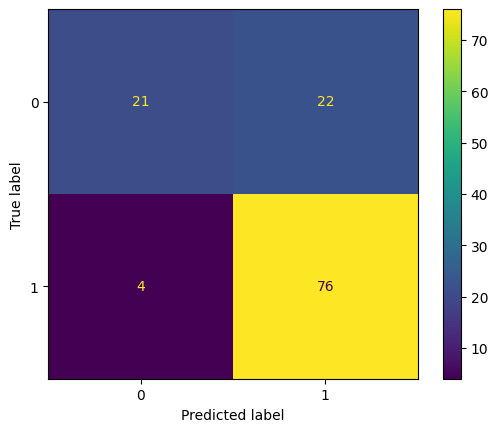

In [ ]:
cmd.plot()

From KNearest Neighbors ConfusionMatrix we observe that:

21 loan applications are classified as 'approved loans' and 77 loan applications classified under 'loan denied'.

22 loan applications misclassified as 'approved loan' and 3 loan applications misclassified as 'loan denied'.


In [ ]:
# Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

a=accuracy_score(y_test,y_pred1)
print('Accuracy: ',a*100,'\n')
print(classification_report(y_test,y_pred1))

Accuracy:  78.86178861788618 

              precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.78      0.95      0.85        80

    accuracy                           0.79       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.80      0.79      0.77       123



In [ ]:
training_score = knn_model.score(x_train,y_train)
training_score

0.8268839103869654

In [ ]:
testing_score =knn_model.score(x_train,y_train)
testing_score

0.8268839103869654

2) NAIVE BAYES : GaussianNB
Naive Bayes is a probabilistic classification algorithm based on Bayes theorem.it assume that the features are independent of each other,making the calculation computationally efficient. This type of Naive Bayes is used when variables are continuous in nature.

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(x_train,y_train)
y_pred2 = bayes_model.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred2)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[22 21]
 [ 2 78]]


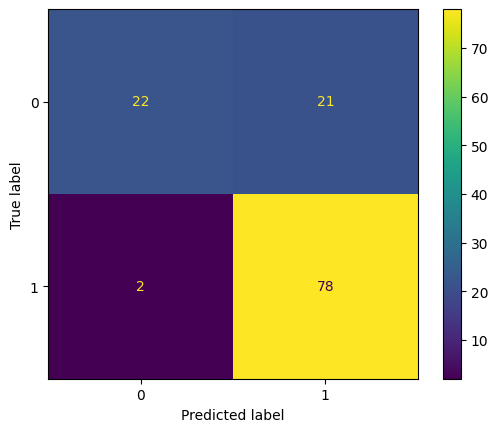

In [ ]:
cmd.plot()

In [ ]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

b=accuracy_score(y_test,y_pred2)
print('Accuracy: ',b*100,'\n')
print(classification_report(y_test,y_pred2))

Accuracy:  81.30081300813008 

              precision    recall  f1-score   support

           0       0.92      0.51      0.66        43
           1       0.79      0.97      0.87        80

    accuracy                           0.81       123
   macro avg       0.85      0.74      0.76       123
weighted avg       0.83      0.81      0.80       123



In [ ]:
training_score = bayes_model.score(x_train,y_train)
training_score

0.7983706720977597

In [ ]:
testing_score =bayes_model.score(x_train,y_train)
testing_score

0.7983706720977597

3) NAIVE BAYES : BernoulliNB
Bernoulli Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
This is used when features are binary. So instead of using the frequency of the word, if you have discrete features in 1s and 0s that represent the presence or absence of a feature. In that case, the features will be binary and will use Bernoulli Naive Bayes.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bayes_model1 = BernoulliNB()
bayes_model1.fit(x_train,y_train)
y_pred3 = bayes_model1.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred3)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[21 22]
 [ 1 79]]


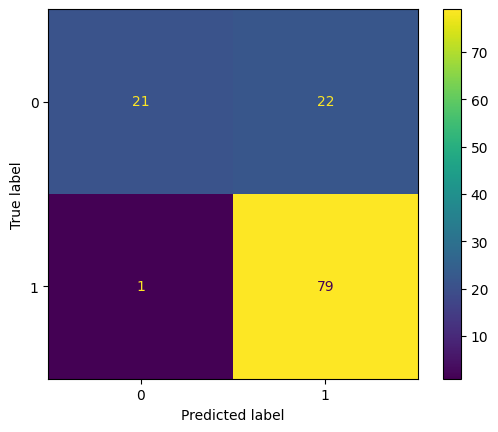

In [ ]:
cmd.plot()

In [ ]:
#Accuracy score and clasification report
from sklearn.metrics import accuracy_score,classification_report

c=accuracy_score(y_test,y_pred3)
print('Accuracy: ',c*100,'\n')
print(classification_report(y_test,y_pred3))

Accuracy:  81.30081300813008 

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123



In [ ]:
training_score = bayes_model1.score(x_train,y_train)
training_score

0.8044806517311609

In [ ]:
testing_score = bayes_model1.score(x_train,y_train)
testing_score

0.8044806517311609

4) Support Vector Machine
Here the Machine Learning models learn from the past input data and predict the output.support vector machines are basically supervised learning models used for classification and regression analysis.

In [ ]:
from sklearn.svm import SVC
sv_model=SVC()
sv_model.fit(x_train,y_train)
y_pred4=sv_model.predict(x_test)
y_pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred4)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[21 22]
 [ 0 80]]


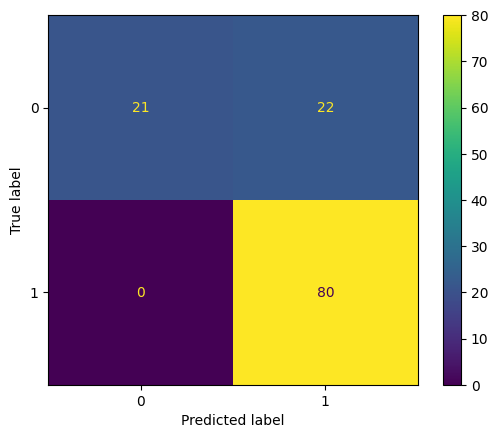

In [ ]:
cmd.plot()

In [ ]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

d=accuracy_score(y_test,y_pred4)
print('Accuracy: ',d*100,'\n')
print(classification_report(y_test,y_pred4))

Accuracy:  82.11382113821138 

              precision    recall  f1-score   support

           0       1.00      0.49      0.66        43
           1       0.78      1.00      0.88        80

    accuracy                           0.82       123
   macro avg       0.89      0.74      0.77       123
weighted avg       0.86      0.82      0.80       123



In [ ]:
training_score = sv_model.score(x_train,y_train)
training_score

0.8268839103869654

In [ ]:
testing_score = sv_model.score(x_train,y_train)
testing_score

0.8268839103869654

5) DecisionTreeClassifier
Decision Trees(DTs) are a non-parametric supervised learning method used for classification and regression.the goal is to create the model that predict the value of a target variable by learning simple decision rules inferred from the data features.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(max_depth = 5,criterion = 'entropy')
tree_model.fit(x_train,y_train)
y_pred5 = tree_model.predict(x_test)
y_pred5

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
#confusion matrixfrom sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred5)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[21 22]
 [ 7 73]]


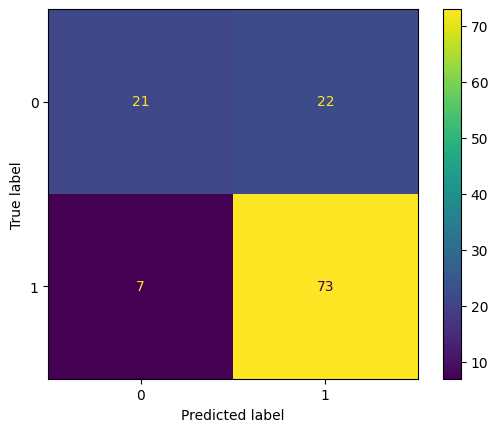

In [ ]:
cmd.plot()

In [ ]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

e=accuracy_score(y_test,y_pred5)
print('Accuracy: ',e*100,'\n')
print(classification_report(y_test,y_pred5))

Accuracy:  76.42276422764228 

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123



In [ ]:
training_score = tree_model.score(x_train,y_train)
training_score

0.8370672097759674

In [ ]:
testing_score = tree_model.score(x_train,y_train)
testing_score

0.8370672097759674

6) RandomForest Classifier
A Random forest is a machine learning technique that is used to solve regression and classification problems.it utilizes ensemble learning,which is a technique that combines many classifiers to provide solution to complex problems.easy to use machine learning algorithm that produce,even without hyper-parameter tuning,a great result most of the time.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
forest_model.fit(x_train,y_train)
y_pred6 = forest_model.predict(x_test)
y_pred6

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred6)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[21 22]
 [ 2 78]]


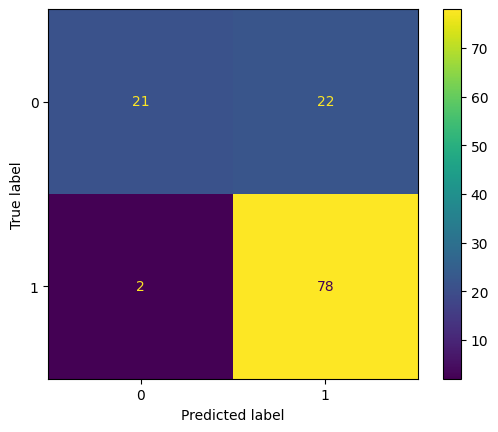

In [ ]:
cmd.plot()

In [ ]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

f=accuracy_score(y_test,y_pred6)
print('Accuracy: ',f*100,'\n')
print(classification_report(y_test,y_pred6))


Accuracy:  80.48780487804879 

              precision    recall  f1-score   support

           0       0.91      0.49      0.64        43
           1       0.78      0.97      0.87        80

    accuracy                           0.80       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.80      0.79       123



In [ ]:
training_score =forest_model.score(x_train,y_train)
training_score

0.8391038696537678

In [ ]:
testing_score = forest_model.score(x_train,y_train)
testing_score

0.8391038696537678

7) AdaBoostClassifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier(n_estimators=10,learning_rate=1.0)
adb_model.fit(x_train,y_train)
y_pred7=adb_model.predict(x_test)
y_pred7

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred7)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[21 22]
 [ 3 77]]


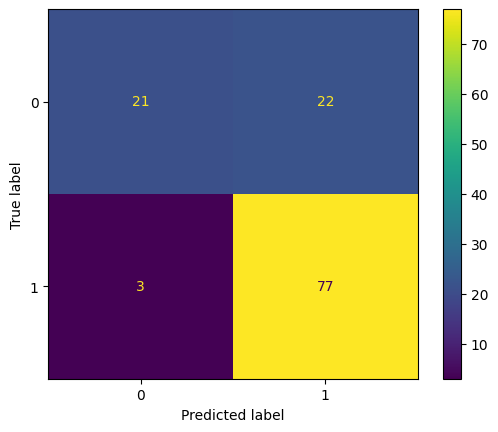

In [ ]:
cmd.plot()

In [ ]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

g=accuracy_score(y_test,y_pred7)
print('Accuracy: ',g*100,'\n')
print(classification_report(y_test,y_pred7))

Accuracy:  79.67479674796748 

              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123



In [ ]:
training_score = adb_model.score(x_train,y_train)
training_score

0.8187372708757638

In [ ]:
training_score = adb_model.score(x_train,y_train)
training_score

0.8187372708757638

8) XgBoost
XgBoost is a gradient boosting algorithm for supervised learning. It’s a highly efficient and scalable implementation of the boosting algorithm, with performance comparable to that of other state-of-the-art machine learning algorithms in most cases.

In [ ]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(x_train,y_train)
y_pred8 = xg_model.predict(x_test)
y_pred8

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred8)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[22 21]
 [ 6 74]]


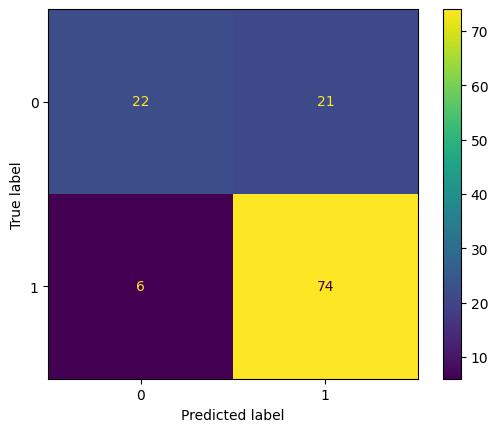

In [ ]:
cmd.plot()

In [ ]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

h=accuracy_score(y_test,y_pred8)
print('Accuracy: ',h*100,'\n')
print(classification_report(y_test,y_pred8))

Accuracy:  78.04878048780488 

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        43
           1       0.78      0.93      0.85        80

    accuracy                           0.78       123
   macro avg       0.78      0.72      0.73       123
weighted avg       0.78      0.78      0.77       123



In [ ]:
training_score = xg_model.score(x_train,y_train)
training_score

1.0

In [ ]:
training_score = xg_model.score(x_train,y_train)
training_score

1.0

9) LogisticRegression
Logistic regression is one of the most popular machine learning algorithms,and its used for predict the categorical dependent variable using a given set of independent variable

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred9 = lr_model.predict(x_test)
y_pred9

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred9)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[21 22]
 [ 1 79]]


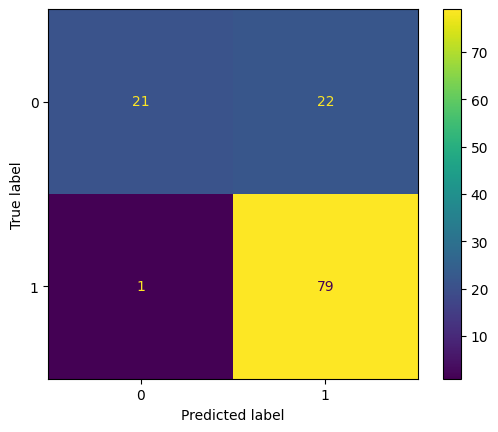

In [ ]:
cmd.plot()

In [ ]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

i=accuracy_score(y_test,y_pred9)
print('Accuracy: ',i*100,'\n')
print(classification_report(y_test,y_pred9))

Accuracy:  81.30081300813008 

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123



In [ ]:
training_score = lr_model.score(x_train,y_train)
training_score

0.8085539714867617

In [ ]:
training_score = lr_model.score(x_train,y_train)
training_score

0.8085539714867617

Accuracy Score Comparison

In [ ]:
dic={'model':['KNN','GN','BN','SVM','DT','RF','AB','XgB','LG'],'accuracy score':[73.17,81.30,81.30,81.30,76.42,79.67,82.11,76.42,81.30]}
result=pd.DataFrame(dic)
result


,model,accuracy score
0,KNN,73.17
1,GN,81.30
2,BN,81.30
3,SVM,81.30
4,DT,76.42
5,RF,79.67
6,AB,82.11
7,XgB,76.42
8,LG,81.30


<Axes: xlabel='model', ylabel='accuracy score'>

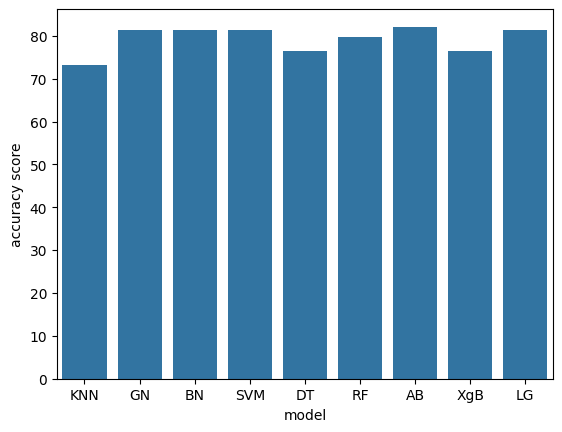

In [ ]:
sns.barplot(x='model',y='accuracy score',data=dic)


To Check The Performance Of The Balanced Dataset
Balancing an imbalanced data set

Balancing an imbalanced dataset is an important preprocessing step when working with machine learning models, especially in classification tasks. There are several techniques you can use to balance your dataset. Here, I'll use the method: oversampling.

Oversampling
Oversampling is a technique used in machine learning to address class imbalance by increasing the number of instances in the minority class (the less frequent class). This helps to balance the class distribution, which can lead to better model performance

Model with implementation of SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) - For data balancing

In [ ]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()

x_res,y_res = sm.fit_resample(x,y)

In [ ]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [ ]:
y_res.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1 = train_test_split(x_res,y_res,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.fit_transform(x_test1)


In [ ]:
adb_model1 = AdaBoostClassifier(n_estimators=10,learning_rate=1.0)
adb_model1.fit(x_train1,y_train1)
y_pred=adb_model1.predict(x_test1)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result_os=confusion_matrix(y_test1,y_pred)
print(result_os)
labels=[0,1]
cmd_os=ConfusionMatrixDisplay(result,display_labels=labels)

[[86  0]
 [83  0]]


In [ ]:
result_os = confusion_matrix(y_test1,y_pred)

In [ ]:
labels=[0,1]
cmd_os=ConfusionMatrixDisplay(result_os, display_labels=labels)

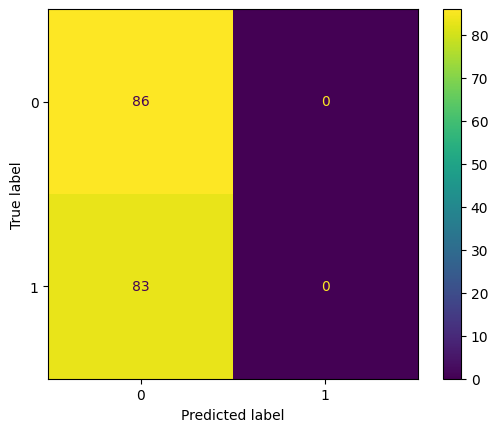

In [ ]:
cmd_os.plot()

In [ ]:
training_score = adb_model1.score(x_train1,y_train1)
training_score

0.8296296296296296

In [ ]:
testing_score = adb_model1.score(x_train1,y_train1)
testing_score

0.8296296296296296

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

print('Accuracy: ',accuracy_score(y_test1,y_pred)*100,'\n')
print(classification_report(y_test1,y_pred))

Accuracy:  50.887573964497044 

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        86
           1       0.00      0.00      0.00        83

    accuracy                           0.51       169
   macro avg       0.25      0.50      0.34       169
weighted avg       0.26      0.51      0.34       169



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



OBSERVATION

Imbalanced data has the highest accuracy score when compared to the balanced data. So we can't choose it as a best model.

HYPER PARAMETER TUNING
Hyperparameters (External Parameters) are adjustable parameters used to obtain an optimal model. Some set of parameters that are used to control the behaviour of the model/algorithm and adjustable in order to obtain an improvised model with optimal performance is called Hyperparameters.

Hyper parameter Tuning refers to the process of choosing the optimum set of hyperparameters for a machine learning model. This process is also called hyperparameter optimization. Here i'am using RandomSearchCV to get the optimum set of hyperparameters.

In Random Search, the list of hyperparameters are trained and test our model on a random combination of given hyperparameters

Applying Hyper Parameter Tuning on Imbalanced Data.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

abc = AdaBoostClassifier()

In [ ]:
param_dist = {
   'n_estimators': sp_randint(50,200),  # Number of base estimators
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate (eta)
    # You can include other AdaBoost-specific hyperparameters here
}


In [ ]:
randomCV = RandomizedSearchCV(abc,param_distributions=param_dist,cv=10)
randomCV.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4894209570>})

In [ ]:

# Create an AdaBoostClassifier with specific hyperparameters
adb_model = AdaBoostClassifier( n_estimators=195,  # Number of base estimators
    learning_rate=1.0,  # Learning rate (eta)
    random_state=42 ) # Set a random seed for reproducibility
adb_model.fit(x_train,y_train)
y_pred_ = adb_model.predict(x_test)

In [ ]:
y_pred_

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

# New Section

In [ ]:
training_score = adb_model.score(x_train,y_train)
training_score

0.8839103869653768

In [ ]:
testing_score = adb_model.score(x_train,y_train)
testing_score

0.8839103869653768

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

print('Accuracy: ',accuracy_score(y_test,y_pred_)*100,'\n')
print(classification_report(y_test,y_pred_))

Accuracy:  73.17073170731707 

              precision    recall  f1-score   support

           0       0.66      0.49      0.56        43
           1       0.76      0.86      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.68      0.68       123
weighted avg       0.72      0.73      0.72       123



OBSERVATION

In this model, the accuracy score improved. So which makes adaboost classifier  the best model in this case.